In [2]:
#example of python connecting to MySQL server and databases
#
import mysql.connector
#
from mysql.connector import Error
import pandas as pd


try:
    ## info (server, user/password)
    connection = mysql.connector.connect(host='localhost',
                                         database='hospital_management',
                                         user='root',
                                         password='Mid;Night;125',
                                         auth_plugin = 'mysql_native_password')
    
    ## if we can connect to the server
    if connection.is_connected():
        ### code to connect to `hospital_management`
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("Your connected to database: ", record)
        ### ------------------------------------- ###

except Error as e:
    print("Error while connecting to MySQL", e)



#you should see the following output
#'''Connected to MySQL Server version  8.0.17
#Your connected to database:  ('classicmodels',)
#True
#MySQL connection is closed'''
#


Connected to MySQL Server version  8.0.31
Your connected to database:  ('hospital_management',)


## Run Queries

In [3]:
# Function to run queries and return records as dataframe
def run_query(query):
    #sql_select_Query = "SELECT * FROM hospital_management.faculty;"
    cursor = connection.cursor()
    cursor.execute(query)
    records = cursor.fetchall()
    columns = [col[0] for col in cursor.description]
    df = pd.DataFrame(records, columns=columns)
    return df    

In [4]:
## Query 1: Show billing amount of all bills of patient with ID 2
query_1 = """
            SELECT medicine_charge + room_charge + doctor_charge AS total_amount 
            FROM bill
            WHERE record_id IN
                (SELECT record_id FROM record
                 WHERE patient_id = 2)
        """
df1 = run_query(query_1)
df1

,total_amount
0,1150.88


In [5]:
## Query 2: Show the name of all patients at the rooms monitored by the nurse with ID 396
query_2 = """
            SELECT firstname, lastname
            FROM patient
            WHERE patient_id IN
                (SELECT patient_id 
                 FROM patient
                 WHERE room_id IN
                     (SELECT room_id 
                      FROM room
                      WHERE nurse_id = 396))
            """
df2 = run_query(query_2)
df2

,firstname,lastname
0,Ozzy,McAdam


In [6]:
## Query 3: Show the name of all patients who are being treated by doctors with specialty “Pediatrics”
query_3 = """
            SELECT firstname, lastname
            FROM patient
            WHERE patient_id IN
                (SELECT patient_id FROM record WHERE record_id IN
                    (SELECT record_id FROM doctor_cases WHERE doctor_id IN
                        (SELECT doctor_id FROM doctor WHERE specialty = "Pediatrics")))
            """
df3 = run_query(query_3)
df3

,firstname,lastname
0,Hope,Laye
1,Kingsley,Seefus
2,Bettye,L'Amie
3,Valery,Acott
4,Dorothea,Cradick
...,...,...
66,Aguistin,Oventon
67,Justen,Paik
68,Cassey,Darbey
69,Ignacius,Quadri


In [7]:
## Query 4: Show doctor_id,first_name,last_name,gender,phone,working_schedule of doctors having specialty of Dermatology
query_4 = """
            SELECT staff_id, firstname, lastname, gender, phone, working_schedule
            FROM faculty f
            JOIN doctor d
            ON f.staff_id = d.doctor_id
           """
df4 = run_query(query_4)
df4

,staff_id,firstname,lastname,gender,phone,working_schedule
0,6,Marline,Iiannone,Female,(232) 7809207,Monday - Sunday 6AM - 4PM\r
1,7,Megan,Duckit,Female,(874) 4658587,Wednesday - Saturday 9AM - 4PM\r
2,15,Felicia,Bolzen,Female,(301) 8508061,Monday - Sunday 9AM - 8PM\r
3,16,Wynne,Merdew,Female,(957) 4022127,Tuesday - Saturday 8AM - 8PM\r
4,17,Katherina,Sorsby,Female,(287) 8133121,Tuesday - Saturday 9AM - 6PM\r
...,...,...,...,...,...,...
195,489,Buiron,Probart,Male,(919) 1796908,Tuesday - Sunday 9AM - 8PM\r
196,490,Farica,Jindrich,Female,(491) 1149797,Wednesday - Thursday 9AM - 6PM\r
197,492,Correna,Corrin,Female,(198) 2145903,Monday - Saturday 8AM - 8PM\r
198,494,Oralie,Hazelgrove,Female,(704) 3300984,Tuesday - Saturday 9AM - 8PM\r


In [8]:
## Query 5: Display female nurses working from Wednesday to Saturday
query_5 = """
            SELECT staff_id, firstname, lastname, phone
            FROM faculty f
            JOIN nurse n
            ON f.staff_id = n.nurse_id
            WHERE gender= "Female" AND working_schedule LIKE "Wednesday - Saturday%"
         """
df5 = run_query(query_5)
df5

,staff_id,firstname,lastname,phone
0,9,Dorolisa,Gallimore,(447) 1329605
1,21,Lenee,Ianelli,(264) 8888925
2,22,Trixi,Dower,(917) 3313401
3,83,Mavis,Earp,(672) 5682784
4,130,Tine,Bison,(690) 8909096
5,144,Roanna,Spraging,(885) 6350376
6,175,Loria,Cherry,(611) 6844676
7,206,Mollee,Raubheim,(157) 9443436
8,238,Wilma,Bickardike,(326) 8588495
9,429,Antonietta,Bagger,(912) 5793840


In [9]:
## Query 6: Calculate total medicine_charges of patients according to blood_type
query_6 = """
            SELECT blood_type, SUM(medicine_charge) AS total_medicine_charge
            FROM patient p
            JOIN record r USING (patient_id)
            JOIN bill b USING (record_id)
            GROUP BY blood_type
          """
df6 = run_query(query_6)
df6

,blood_type,total_medicine_charge
0,O,331655.28
1,B,81953.32
2,A,87657.82
3,AB,169052.48


In [10]:
## Query 7: Display the medicine that has price of more than 40, quantity > 80 and has "hydrochloride" in description 
query_7 = """
            SELECT *
            FROM medicine
            WHERE price > 40 AND quantity > 80 AND ingre_description LIKE "%hydrochloride%"
        """
df7 = run_query(query_7)
df7

,medicine_id,name,price,quantity,ingre_description,manufacturer
0,7,equaline nasal,45.35,82,oxymetazoline hydrochloride,Supervalu Inc
1,38,Lidocaine Hydrochloride,40.41,99,Lidocaine Hydrochloride,Cardinal Health
2,75,ULTRACET,45.02,119,tramadol hydrochloride and acetaminophen,Lake Erie Medical & Surgical Supply DBA Quali
3,116,Mucinex,45.89,101,"acetaminophen, dextromethorphan hydrobromide, ...",Reckitt Benckiser LLC
4,137,TAMSULOSIN HYDROCHLORIDE,42.38,85,TAMSULOSIN HYDROCHLORIDE,WOCKHARDT LIMITED
5,236,NUCYNTA,45.98,123,tapentadol hydrochloride,Stat Rx USA
6,410,Amiodarone Hydrochloride,42.06,101,Amiodarone Hydrochloride,"General Injectables & Vaccines, Inc."
7,418,Trihexyphenidyl Hydrochloride,47.76,89,trihexyphenidyl hydrochloride,Qualitest Pharmaceuticals
8,423,Allergy Relief,41.02,106,cetirizine Hydrochloride,CVS Pharmacy
9,429,Marbeta L Kit,42.87,112,"Betamethasone Sodium Phosphate, Betamethasone ...","Asclemed USA, Inc."


## Visualization

### Number of patients by state (Bar chart)

In [11]:
## The number of patient by state
query_8 = """
            SELECT * FROM patient
        """
df8 = run_query(query_8)
df8

,patient_id,firstname,lastname,dob,phone,gender,address,height,weight,blood_type,room_id
0,1,Erv,Wyd,1977-01-26,(214) 1962183,Male,"08372 Almo Parkway,Dallas,TX",172.25,164.98,O,NaN
1,2,Renault,Scrimshaw,1941-06-06,(502) 5219943,Male,"769 Straubel Junction,Louisville,KY",190.00,129.11,O,NaN
2,3,Marc,Zielinski,1953-04-18,(323) 6962663,Male,"487 Granby Way,Los Angeles,CA",174.00,131.50,AB,NaN
3,4,Ozzy,McAdam,1975-01-03,(202) 6376260,Male,"117 Jana Alley,Washington,DC",168.25,138.41,AB,117.0
4,5,Bernadina,Lelievre,1963-01-19,(573) 8956019,Female,"366 Dryden Court,Columbia,MO",170.50,200.28,O,NaN
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Flynn,Wardhaw,1953-06-11,(203) 1118021,Male,"059 Nevada Park,New Haven,CT",167.00,135.70,O,NaN
996,997,Dorree,Lindsley,1996-10-04,(318) 3219758,Female,"7021 Transport Junction,Shreveport,LA",167.75,170.90,B,NaN
997,998,Emmit,Colly,1955-01-16,(571) 2516679,Male,"147 Algoma Street,Arlington,VA",170.25,173.61,O,NaN
998,999,Jamey,Pixton,2001-12-03,(408) 9179905,Male,"8 Old Gate Center,San Jose,CA",183.00,167.48,O,612.0


In [12]:
list_address = list(df8["address"])
state_counts_dict = {}
for address in list_address:
    state = address.split(",")[-1]
    if state in state_counts_dict:
        state_counts_dict[state] += 1
    else:
        state_counts_dict[state] = 1

state_counts = pd.Series(state_counts_dict)

state_counts

TX    106
KY     12
CA    120
DC     25
MO     23
NV     15
IL     22
MA     20
WA     14
AZ     16
OR      9
IA     12
FL     80
UT     10
PA     33
OH     46
MD     14
CO     26
NH      1
OK     18
NY     57
NJ     13
MN     24
GA     25
NC     21
KS     15
LA     26
MI     20
WV     12
VA     35
AL     19
NE     13
SD      3
CT     12
TN     13
NM      7
IN     16
MT      2
HI      7
MS      3
ID      6
WI     10
SC     13
ND      1
AK      1
AR      2
VT      1
DE      1
dtype: int64

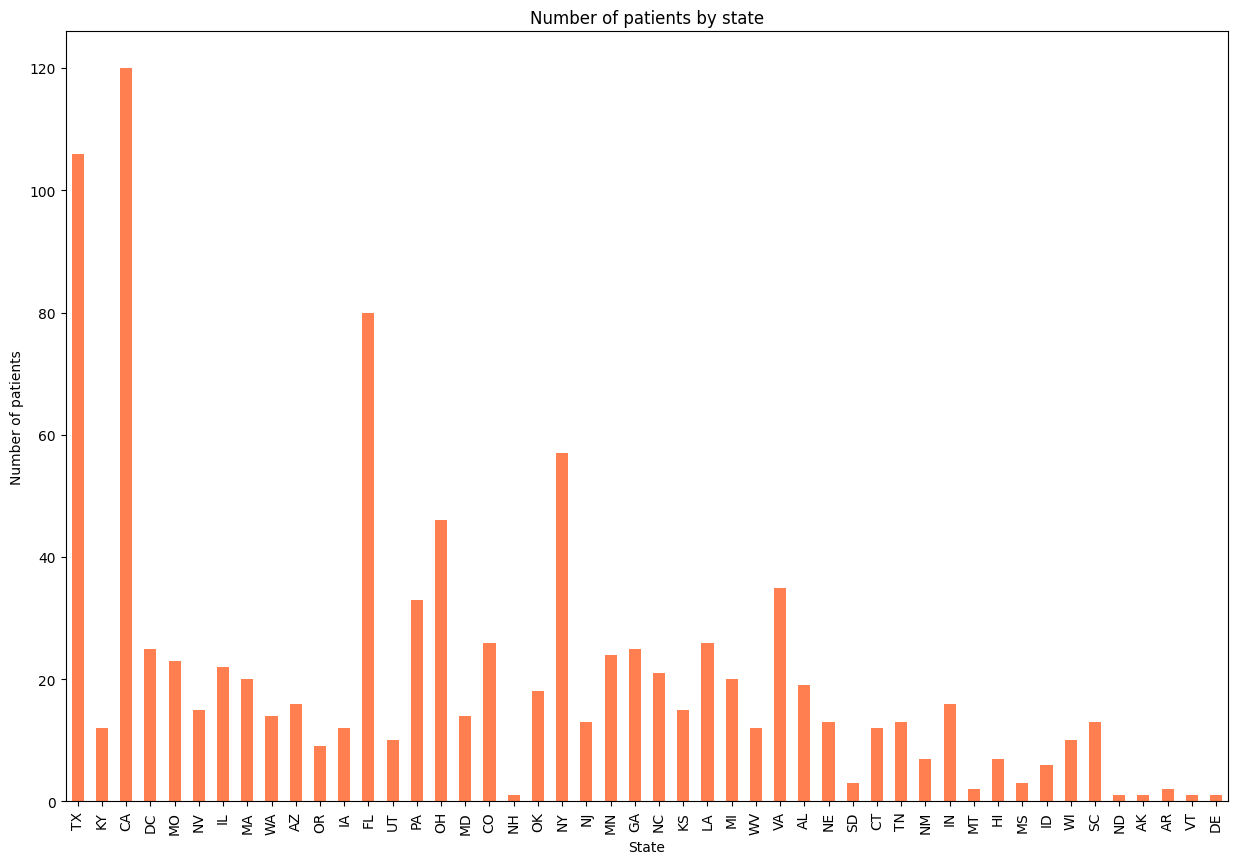

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
ax = state_counts.plot(kind='bar', color='coral')

ax.set_xlabel('State')
ax.set_ylabel('Number of patients')
ax.set_title('Number of patients by state')

plt.show()


### Age Analysis of Doctor and Nurse (Box Plot)

In [14]:
query_9 = """
            SELECT staff_id, dob 
            FROM faculty f
            JOIN doctor d 
            ON f.staff_id = d.doctor_id
            """
df9 = run_query(query_9)

df9['title'] = "doctor"
df9

,staff_id,dob,title
0,6,1969-02-24,doctor
1,7,1973-02-11,doctor
2,15,1971-04-05,doctor
3,16,1952-11-04,doctor
4,17,1955-02-21,doctor
...,...,...,...
195,489,1988-06-14,doctor
196,490,1963-06-28,doctor
197,492,1967-07-27,doctor
198,494,1984-01-02,doctor


In [15]:
query_10 = """
            SELECT staff_id, dob 
            FROM faculty f
            JOIN nurse n
            ON f.staff_id = n.nurse_id
            """
df10 = run_query(query_10)

df10['title'] = "nurse"
df10

,staff_id,dob,title
0,1,1951-06-13,nurse
1,2,1984-11-01,nurse
2,3,1982-06-08,nurse
3,4,1986-05-25,nurse
4,5,1958-09-30,nurse
...,...,...,...
295,495,1968-10-24,nurse
296,496,1971-08-02,nurse
297,497,1985-01-27,nurse
298,499,1950-09-10,nurse


In [16]:
frames = [df9, df10]
age_ana = pd.concat(frames)
age_ana

,staff_id,dob,title
0,6,1969-02-24,doctor
1,7,1973-02-11,doctor
2,15,1971-04-05,doctor
3,16,1952-11-04,doctor
4,17,1955-02-21,doctor
...,...,...,...
295,495,1968-10-24,nurse
296,496,1971-08-02,nurse
297,497,1985-01-27,nurse
298,499,1950-09-10,nurse


In [17]:
from datetime import datetime

dates = pd.to_datetime(age_ana['dob'])
# calculate age based on today's date
current_year = datetime.now().year
age_ana['age'] = current_year - dates.dt.year
print(age_ana)

     staff_id         dob   title  age
0           6  1969-02-24  doctor   54
1           7  1973-02-11  doctor   50
2          15  1971-04-05  doctor   52
3          16  1952-11-04  doctor   71
4          17  1955-02-21  doctor   68
..        ...         ...     ...  ...
295       495  1968-10-24   nurse   55
296       496  1971-08-02   nurse   52
297       497  1985-01-27   nurse   38
298       499  1950-09-10   nurse   73
299       500  1951-12-12   nurse   72

[500 rows x 4 columns]


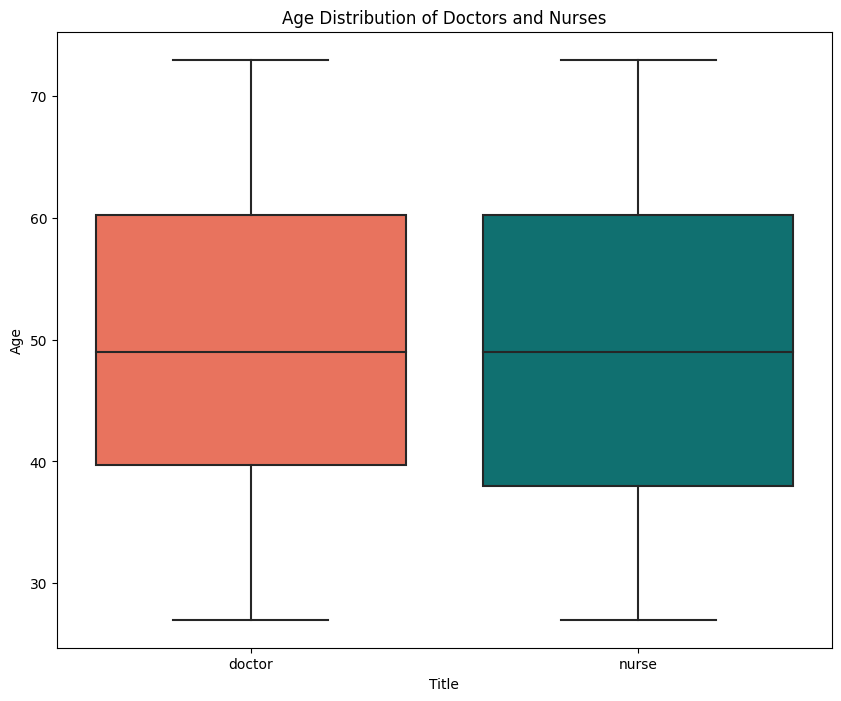

In [20]:
import seaborn as sns
plt.figure(figsize=(10, 8))

# create a box plot of age by title
# sns.boxplot(data=age_ana, x='title', y='age')
# set different colors for the boxes
colors = {'doctor': "tomato", 'nurse': 'teal'}
palette = [colors[title] for title in age_ana['title'].unique()]

# create the box plot with different colors
sns.boxplot(data=age_ana, x='title', y='age', palette=palette)

# add labels and title
plt.xlabel('Title')
plt.ylabel('Age')
plt.title('Age Distribution of Doctors and Nurses')

# show the plot
plt.show()

### Top 10 diagnoses (Donut chart)

In [21]:
query_10 = """
                SELECT * FROM record
        """
df10 = run_query(query_10)
df10

,record_id,date_admitted,date_discharged,diagnosis,treatment,patient_id
0,1,2022-01-01,2022-01-09,Cluster headache,Separat equal join twin,379
1,2,2022-12-22,2022-12-26,Alzheimer's disease,Assisted pool exercise,482
2,3,2022-12-27,2023-01-04,Melanoma,Spleen transplantation,706
3,4,2023-01-02,2023-01-04,Glaucoma,Opn dir ing hern-gft NEC,432
4,5,2022-05-11,2022-05-12,Pneumonia,Dental operation NEC,714
...,...,...,...,...,...,...
1195,1196,2022-07-21,2022-07-24,Diabetes,Per nerve adhesiolys NEC,507
1196,1197,2022-11-20,2022-11-21,Bipolar disorder,Anal sphincterotomy NEC,423
1197,1198,2022-03-30,2022-04-04,Pancreatitis,Partial patellectomy,431
1198,1199,2022-03-18,2022-03-27,Glaucoma,Electromyography,747


In [22]:
df10['diagnosis'].value_counts()

Kidney stones                             25
Pneumococcal disease                      22
Anemia                                    19
Tinnitus                                  19
Cirrhosis                                 18
                                          ..
Measles                                    7
Interstitial cystitis                      7
Gastroesophageal reflux disease (GERD)     7
Psoriasis                                  7
Multiple myeloma                           5
Name: diagnosis, Length: 95, dtype: int64

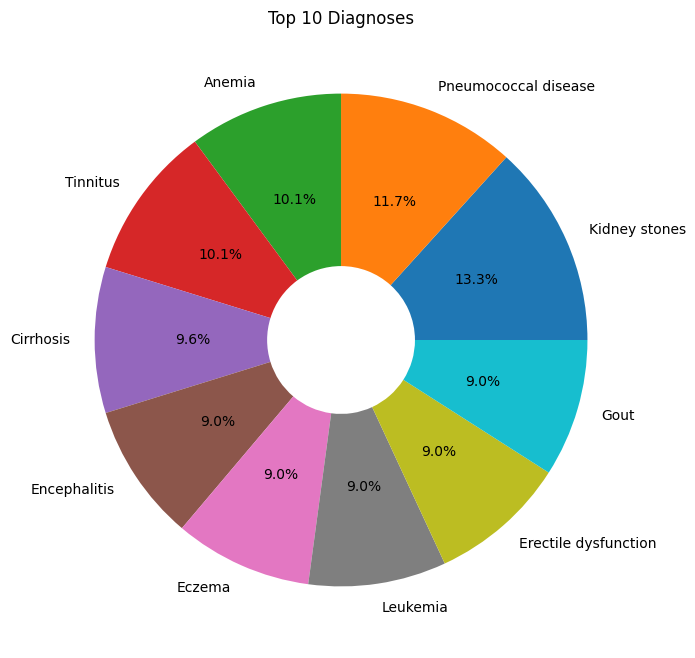

In [23]:
# count the number of patients for each diagnosis and just get top 10 diagnoses
top_diagnoses = df10['diagnosis'].value_counts().nlargest(10)

# Create donut chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(top_diagnoses, labels=top_diagnoses.index, wedgeprops=dict(width=0.7), autopct='%1.1f%%')
ax.set_title('Top 10 Diagnoses')

plt.show()

In [ ]:
WITH temporary AS (
	SELECT r.*
    FROM record r
    JOIN patient p USING (patient_id)
    WHERE p.room_id IS NOT NULL
)
SELECT *
FROM temporary
JOIN bill b USING (record_id)

In [24]:
if (connection.is_connected()):
    cursor.close()
    connection.close()
    print("MySQL connection is closed")

MySQL connection is closed
